
# Fuzzy c-means clustering

Fuzzy logic principles can be used to cluster multidimensional data, assigning
each point a *membership* in each cluster center from 0 to 100 percent. This
can be very powerful compared to traditional hard-thresholded clustering where
every point is assigned a crisp, exact label.

Fuzzy c-means clustering is accomplished via ``skfuzzy.cmeans``, and the
output from this function can be repurposed to classify new data according to
the calculated clusters (also known as *prediction*) via
``skfuzzy.cmeans_predict``

## Data generation and setup

In this example we will first undertake necessary imports, then define some
test data to work with.

In [1]:
!pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

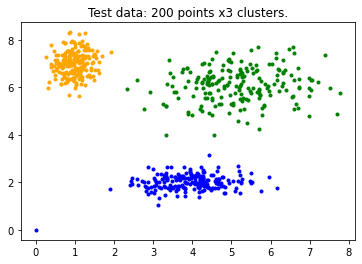

In [5]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')


## Clustering

Above is our test data. We see three distinct blobs. However, what would happen
if we didn't know how many clusters we should expect? Perhaps if the data were
not so clearly clustered?

Let's try clustering our data several times, with between 2 and 9 clusters.

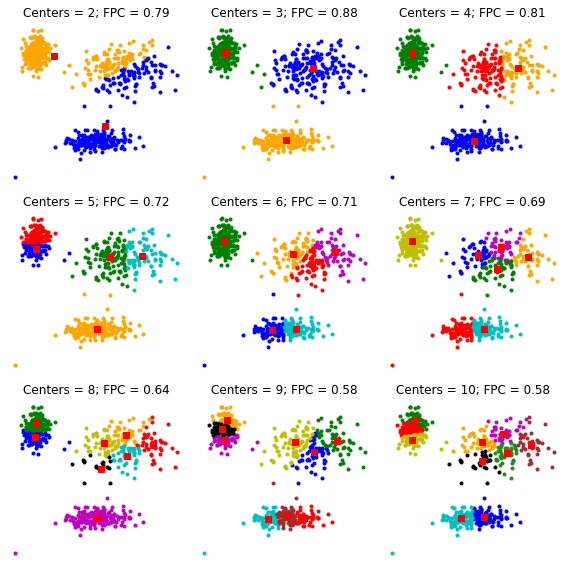

In [6]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

## The fuzzy partition coefficient (FPC)

The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric
which tells us how cleanly our data is described by a certain model. Next we
will cluster our set of data - which we know has three clusters - several
times, with between 2 and 9 clusters. We will then show the results of the
clustering, and plot the fuzzy partition coefficient. When the FPC is
maximized, our data is described best.

Text(0, 0.5, 'Fuzzy partition coefficient')

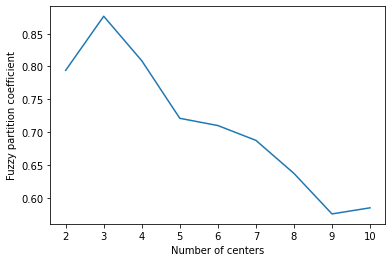

In [7]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

## EXERC 1
Understand the results above.

## EXERC 2
Understand the simple sklearn example below

In [11]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=d24346ed652be225ba620f3c45762afa392c270c6b021ee4c513ed49137288c4
  Stored in directory: /Users/eugenio/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


## EXERC 3
Repeat the code of PROBLEM 2 but working for the same data of the fuzzy algorithm, i.e. with do not use X variable but the values in xpts and ypts variables

## EXERC 4
Implement the Fuzzy Clustering only for calculating the same as PROBLEM 3

## EXERC 5

Compare the results of both algorithms